<a href="https://colab.research.google.com/github/ckh0103/data_anal/blob/main/ch05_line.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gdown
gdown.download("https://bit.ly/3pK7iuu", 'ns_book7.csv', quiet=False)

Downloading...
From: https://bit.ly/3pK7iuu
To: /content/ns_book7.csv
100%|██████████| 53.8M/53.8M [00:00<00:00, 106MB/s]


'ns_book7.csv'

In [2]:
import pandas as pd

ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
ns_book7.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [3]:
# 발행년도 별 발간 도서의 개수
# k = 발행년도, v = 개수

count_by_year = ns_book7['발행년도'].value_counts()
count_by_year

,count
발행년도,
2012,18601
2014,17797
2009,17611
2011,17523
2010,17503
...,...
2548,1
1948,1
1967,1


In [4]:
# 인덱스로 정렬

count_by_year = count_by_year.sort_index()
count_by_year

,count
발행년도,
1947,1
1948,1
1949,1
1952,11
1954,1
...,...
2551,1
2552,2
2559,1


In [8]:
count_by_year = count_by_year[count_by_year.index <= 2025]
count_by_year

,count
발행년도,
1947,1
1948,1
1949,1
1952,11
1954,1
...,...
2018,16423
2019,15220
2020,11834


In [11]:
import numpy as np

def kdc_1st_char(no):

  # 000 총류 ~ 900 역사 // 맨 앞자리가 큰 분류에 해당
  if no is np.nan:
    return '-1'
  else:
    return no[0] # 큰 분류에 해당되는 맨앞자리 데이터

count_by_subject = ns_book7['주제분류번호'].apply(kdc_1st_char).value_counts()
count_by_subject

,count
주제분류번호,
8,108643
3,80767
5,40916
9,26375
6,25070
1,22647
-1,16978
7,15836
4,13688


In [12]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

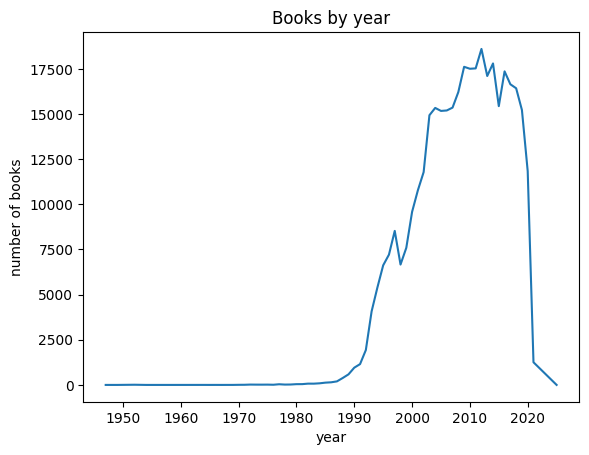

In [13]:
# plot() - 선 그래프

plt.plot(count_by_year.index, count_by_year.values)

plt.title('Books by year')
plt.xlabel('year')

plt.ylabel('number of books')
plt.show()

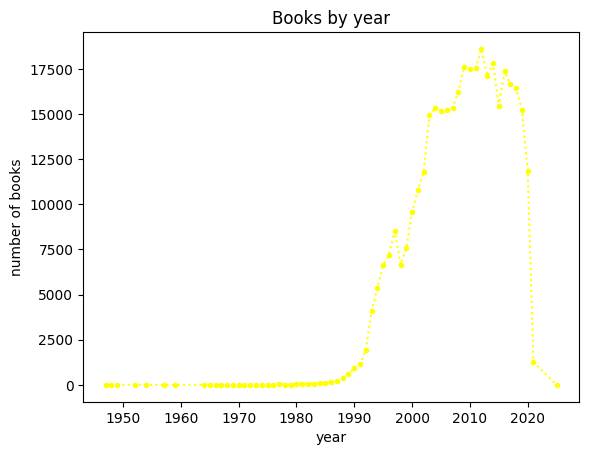

In [26]:
# plot() - 선그래프

plt.plot(count_by_year, marker='.', linestyle=":", color='yellow')

plt.title('Books by year')
plt.xlabel('year')

plt.ylabel('number of books')
plt.show()


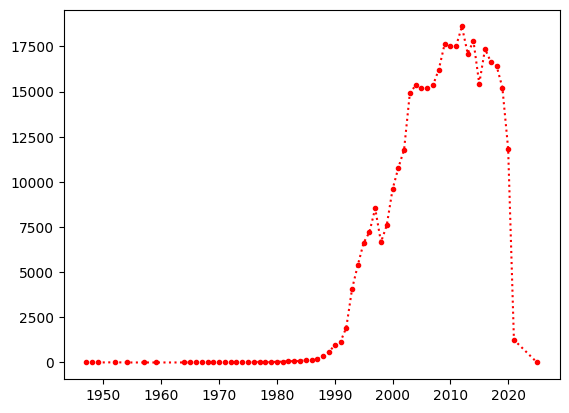

In [42]:
plt.plot(count_by_year, '.:r')

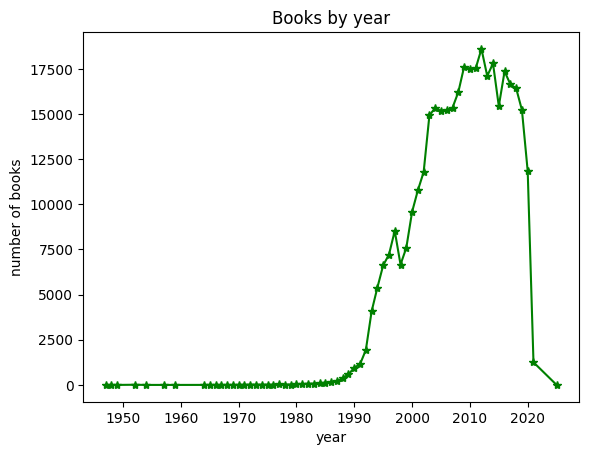

In [28]:
# plot() - 선그래프

plt.plot(count_by_year, '*-g')
plt.title('Books by year')
plt.xlabel('year')

plt.ylabel('number of books')
plt.show()

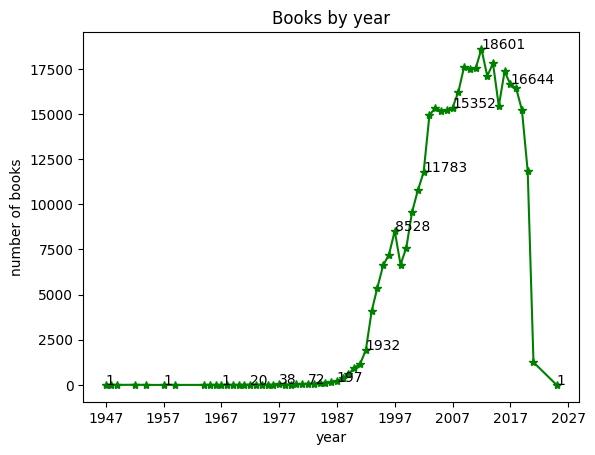

In [43]:
# plot() - 선그래프

plt.plot(count_by_year, '*-g')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')

plt.xticks(range(1947, 2030, 10))

# count_by_year[::5] -> 부분데이터프레임 시작:끝:step
# 시작부분이 맨 처음이면 생략
# 끝 부분이 맨 마지막이면 생략
for idx, val in count_by_year[::5].items():

  # annotate(데이터, (위치)) - 그래프 안에 값을 표시할 때 사용 함수
  plt.annotate(val, (idx, val))

plt.show()

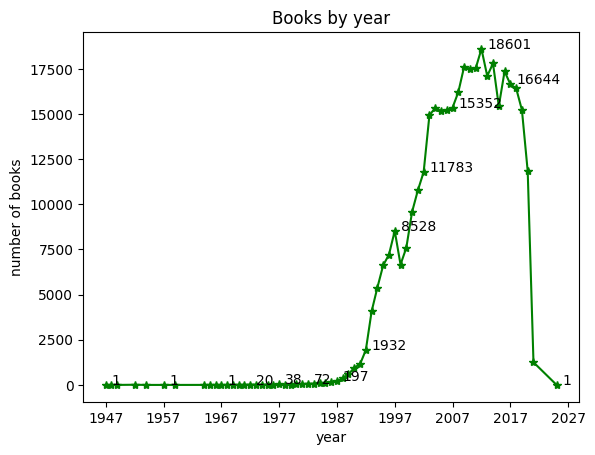

In [46]:
# plot() - 선그래프

plt.plot(count_by_year, '*-g')
plt.title('Books by year')
plt.xlabel('year')
plt.ylabel('number of books')

plt.xticks(range(1947, 2030, 10))

for idx, val in count_by_year[::5].items():
  plt.annotate(val, (idx, val), xytext=(idx+1, val+10))

plt.show()